<h1>Apple Quality</h1>

<p> Looking at data from the quality of apples I am predicitng that there will be more apples scored as "Good" if they score higher in both Sweetness and Crunchiness than in any other category. </p>


<img src="Apple.png" alt="Cartoon Apple" width="350" height="350">

In [46]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

%matplotlib inline 

In [47]:
pwd


'/Users/damian/Documents/Coding/Python Project'

In [48]:
df = pd.read_csv('apple_quality.csv')

In [49]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


<h2>Initial thoughts</h2>
<br>
<p>Asked Chat GPT what most people would think makes a good apple - sweetness was the recurring theme. Asked in the whatsappp group and crunchiness was the recurring theme. So therefore I am predicting that apples with a higher score in both of these qualities will have the majority of good quality scores.</p>
<br>
<p>Checking the data set online and related comments to find what the negative scores mean in relation to a "standard score" and there is no qualiftying information so may have to discard.</p>

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [51]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

<p>Check if there are any qualities other than bad or good.</p>

In [52]:
df.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [53]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


<p> As we looked at potentially removing the negative values we will keep them as the range in some seems to be equally spread from negative to positive. Maybe the negatives are relative to a standard score.?</p>

In [54]:
df.Sweetness.max()


6.374915513

In [55]:
df.Sweetness.min()

-6.894485494

In [56]:
the_sweetest = df.sort_values(by='Sweetness', ascending=False)[0:500]
not_sweet = df.sort_values(by='Sweetness', ascending=True)[0:500]

In [57]:
the_sweetest.Sweetness.describe()

count    500.000000
mean       2.821832
std        0.845926
min        1.769988
25%        2.174851
50%        2.608710
75%        3.301345
max        6.374916
Name: Sweetness, dtype: float64

In [58]:
not_sweet.Sweetness.describe()

count    500.000000
mean      -3.642389
std        0.796393
min       -6.894485
25%       -4.088351
50%       -3.419240
75%       -3.026050
max       -2.647112
Name: Sweetness, dtype: float64

In [59]:
df.Crunchiness.max()


7.619851801

In [60]:
df.Crunchiness.min()

-6.055057805

<p> I decided to use the top and bottom 500 of the data set to try and get a relaistic view of the best versus the worst in both Sweetness and Crunchiness.</p>

In [61]:
the_crunchiest = df.sort_values(by='Crunchiness', ascending=False)[0:500]
not_crunchy = df.sort_values(by='Crunchiness', ascending=True)[0:500]

In [62]:
the_crunchiest.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1921.976000,0.338700,-1.163670,-0.652613,3.280340,-0.221077,-0.435371
std,1197.895347,1.797411,1.740940,1.850158,0.737447,2.202406,2.065276
min,17.000000,-7.151703,-6.235107,-5.746674,2.555178,-5.961897,-5.864599
25%,868.250000,-0.822491,-2.283760,-1.857201,2.769503,-1.814233,-1.855251
50%,1853.500000,0.370705,-1.223433,-0.671272,3.071513,-0.223517,-0.592345
75%,2998.250000,1.473337,0.009478,0.648915,3.538473,1.453031,1.073968
max,3986.000000,5.865861,5.149000,4.445395,7.619852,6.098778,5.309622


In [63]:
not_crunchy.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1961.674000,-0.828640,-0.687533,-0.209760,-1.341405,1.231654,0.887465
std,1140.079194,2.319866,1.768626,2.104656,0.699866,1.958035,1.930033
min,0.000000,-6.905803,-5.542290,-5.958315,-6.055058,-4.486982,-3.810387
25%,982.750000,-2.601731,-1.829916,-1.545242,-1.644834,-0.100084,-0.496295
50%,2007.500000,-0.929708,-0.641118,-0.251545,-1.138326,1.063921,0.853048
75%,2868.750000,0.837197,0.474313,1.201767,-0.823220,2.529068,2.201816
max,3999.000000,4.842414,5.014002,5.346330,-0.586203,7.364403,6.503375


<p> From the data we can conclude that the 500 least crunchy apples would have a score <-0.586203 </p>
<br>
<p> To get an example of whether a not crunchy apple equals a bad quality apple I ran the max imum score of the lowest 500 apples against the good quality </p>


In [64]:
df.query('Quality == "bad" and Crunchiness <= -0.586203	')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
10,10.0,-2.699336,-1.329507,-1.418507,-0.625546,2.371074,3.403165,-2.810808169,bad
61,61.0,-4.674141,0.797046,-0.897213,-1.393983,0.492130,3.201708,-0.58628671,bad
78,78.0,-2.178069,0.711060,-2.723528,-0.794619,1.371632,2.661669,-1.43801903,bad
82,82.0,2.355047,-0.805007,-4.046869,-0.621274,2.721017,1.403612,-1.735117708,bad
...,...,...,...,...,...,...,...,...,...
3814,3814.0,1.711419,0.928887,-4.111322,-0.808203,4.163023,0.456023,-1.356739922,bad
3820,3820.0,0.521688,-1.574657,-1.151515,-1.139001,2.758709,-1.573511,3.002468885,bad
3845,3845.0,-0.115818,-0.839196,-1.303284,-1.069225,0.802508,3.828883,-0.154144723,bad
3851,3851.0,-0.739510,-0.754330,-2.714029,-0.722122,-0.530147,2.862132,-1.844098803,bad


In [65]:
df.query('Quality == "good" and Crunchiness <= -0.586203	')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
32,32.0,1.681663,-2.981674,-0.079805,-0.947866,3.034813,-0.708611,1.166970737,good
50,50.0,-2.938617,0.524455,0.802257,-1.475931,-0.336349,1.430648,-2.298875523,good
...,...,...,...,...,...,...,...,...,...
3944,3944.0,-3.192861,-1.228865,3.270763,-0.829909,0.230200,1.318141,-0.593803367,good
3955,3955.0,-4.960451,0.699911,2.862232,-3.674746,-0.028949,0.194217,-3.726145619,good
3983,3983.0,-3.652936,-1.117509,3.271792,-1.266320,2.360319,0.007212,-2.022186257,good
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good


<p> Let's run the lowest score of the top 500 apples in both sweetness and Crunchiness, the closer the result is to 500 the closer we are to proving our theory. </p>

In [66]:
df.query('Quality == "good" and Crunchiness <= -0.586203 and Sweetness <= -2.647112 ')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
54,54.0,3.010344,-3.423029,-3.110978,-1.543045,3.567608,1.696233,0.445840404,good
76,76.0,2.249782,1.306811,-3.362143,-3.292343,1.536373,2.322694,0.171703758,good
385,385.0,2.316935,-1.765647,-3.142249,-0.896767,1.303793,1.672412,-0.964795146,good
609,609.0,1.072178,1.404350,-2.709087,-0.908657,-0.125466,0.998452,0.796064138,good
615,615.0,2.275232,-1.197066,-3.300744,-1.989807,3.369321,1.931644,2.191252624,good
2055,2055.0,-0.567317,3.332821,-4.557395,-1.008061,-1.190466,2.600116,-3.023189457,good
2549,2549.0,0.715230,2.700857,-2.780518,-1.566420,1.023802,0.191156,0.186521133,good
2575,2575.0,2.180187,-1.511394,-2.686208,-2.396660,1.132262,2.050631,-0.228236467,good
2896,2896.0,3.781344,1.038156,-4.181016,-1.125167,0.948119,2.328204,-2.161802976,good
3177,3177.0,-2.954896,4.202643,-3.468046,-2.146075,-1.400879,1.096128,-1.679607938,good


<p> Results are starting to improve on the theory!! </p>

In [67]:
df.query('Quality == "good" and Crunchiness >= 2.555178 and Sweetness >= 1.769988')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
34,34.0,-0.034368,-1.332805,2.329101,2.862759,0.825239,1.062672,2.300330525,good
106,106.0,-0.725181,-1.447134,1.840994,3.086182,2.229222,0.555091,3.040761752,good
231,231.0,-2.619934,-2.222210,3.210162,3.198227,4.005137,-0.869893,-0.630160574,good
325,325.0,-0.213848,-2.515762,2.839239,2.741099,1.001384,1.325266,2.914469166,good
412,412.0,-0.704063,-5.227087,4.445395,3.243947,1.186647,2.484259,3.065090038,good
539,539.0,-2.523331,-2.572632,1.839096,2.910987,-0.147553,-4.636484,-0.142418513,good
564,564.0,-0.514291,-0.986577,2.178764,2.855630,2.137710,0.153366,0.553623544,good
679,679.0,-0.711035,-3.377667,1.825955,2.683286,2.706476,1.076923,0.536212238,good
733,733.0,-0.500416,-1.898360,3.126678,2.563035,2.919934,-0.984561,-2.318115994,good
899,899.0,2.081553,-3.903800,2.628814,3.289790,0.304922,2.287816,2.600239701,good


In [68]:
df.query('Quality == "good" and Crunchiness >= 2.555178 and Sweetness >= 1.769988').describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1854.909091,-0.262062,-2.817375,2.624394,3.094576,1.717619,0.369386
std,1251.496014,1.558552,1.651461,0.703110,0.442379,1.590024,2.260096
min,34.000000,-3.437178,-6.000748,1.784127,2.555178,-1.906023,-4.636484
25%,733.000000,-0.805739,-4.270979,2.178764,2.731772,0.825239,-0.984561
50%,1590.000000,-0.300497,-2.790195,2.469892,3.015666,2.183923,0.709942
75%,2861.000000,0.635970,-1.898360,3.014961,3.311564,2.919934,1.718457
max,3933.000000,3.318008,1.459745,4.445395,4.175668,4.763398,4.258164


In [69]:
df.query('Quality == "bad" and Crunchiness >= 2.555178 and Sweetness >= 1.769988')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
253,253.0,-3.136921,0.203914,2.312981,4.400782,-4.786379,1.181213,-1.445193398,bad
1138,1138.0,-2.469140,-0.795279,1.931253,3.513258,-1.470258,1.327658,-1.192430581,bad
1245,1245.0,0.457311,-3.740913,3.264173,3.425624,-3.962506,-2.853538,-1.0020498,bad
1305,1305.0,-4.772981,0.872815,4.008526,3.183735,-1.402376,-1.918003,2.771449533,bad
1314,1314.0,-5.015906,-1.950260,3.213235,2.778097,0.831640,0.039787,3.597187215,bad
1632,1632.0,-2.811334,-0.860927,2.274015,3.546890,-1.607591,1.637376,1.438698948,bad
1760,1760.0,-0.904086,-1.592801,2.039240,3.144233,-2.484706,-1.851618,3.389386459,bad
1941,1941.0,2.507582,-3.544390,2.909641,3.740228,-4.433226,-3.998858,-0.88488274,bad
2017,2017.0,-0.922571,-1.977242,3.451115,3.809666,-4.929679,-5.611400,-1.094247351,bad
2270,2270.0,-3.769523,0.377353,2.823276,2.978486,-1.665854,-1.740689,4.157028537,bad


In [70]:
df.query('Quality == "bad" and Crunchiness >= 2.555178 and Sweetness >= 1.769988').describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2358.473684,-1.525050,-1.272691,2.608864,3.199548,-2.099549,-1.270692
std,1060.600373,2.022633,1.487716,0.625148,0.468845,1.808504,1.856571
min,253.000000,-5.015906,-3.740913,1.799936,2.611346,-4.929679,-5.611400
25%,1473.000000,-2.853065,-2.271242,2.156627,2.854719,-3.495773,-2.360706
50%,2270.000000,-1.733816,-1.137386,2.501078,3.059997,-2.047081,-0.837848
75%,3314.500000,0.211410,0.129735,3.061438,3.523396,-0.943650,-0.259154
max,3808.000000,2.507582,0.872815,4.008526,4.400782,0.831640,1.637376


<p> Looking at the 2 sets of data it's clear that although there is a small victory for being crunchier and sweeter as an apple there is evidence to suggest that being juicier is better. </p>

<p> 33 out of the sample size returned as good and 19 returned as bad </p>


<Axes: xlabel='Crunchiness', ylabel='Quality'>

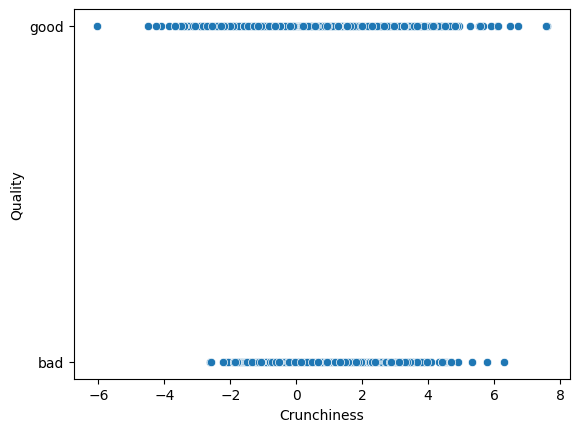

In [71]:
sns.scatterplot(data=df, x="Crunchiness", y="Quality")

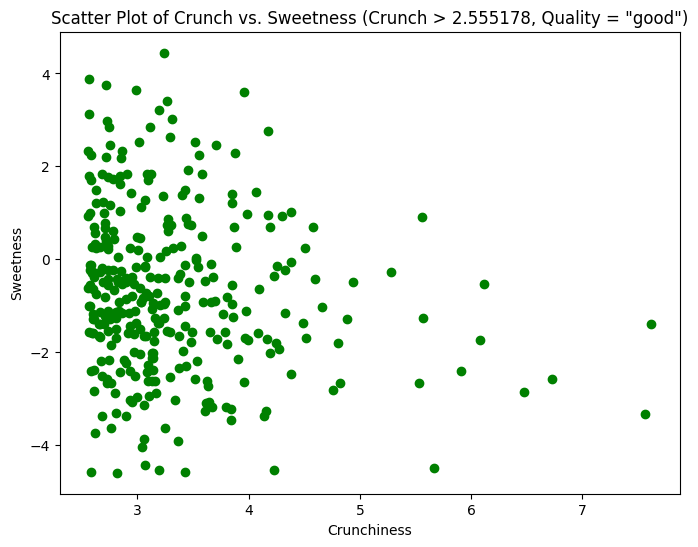

In [75]:
filtered_df = df[(df['Crunchiness'] > 2.555178) & (df['Quality'] == 'good')]

x = filtered_df['Crunchiness']
y = filtered_df['Sweetness']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c = "green")

plt.xlabel('Crunchiness')
plt.ylabel('Sweetness')
plt.title('Scatter Plot of Crunch vs. Sweetness (Crunch > 2.555178, Quality = "good")')

plt.show()

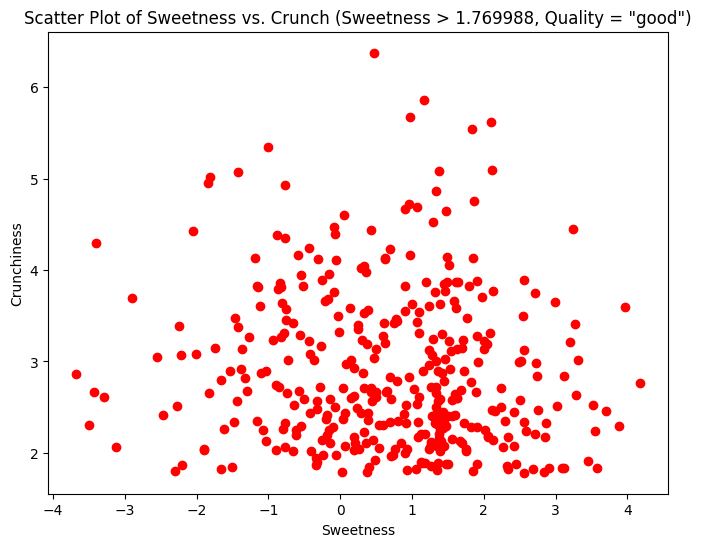

In [77]:
filtered_df = df[(df['Sweetness'] > 1.769988) & (df['Quality'] == 'good')]

x = filtered_df['Crunchiness']
y = filtered_df['Sweetness']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c = "red")

plt.xlabel('Sweetness')
plt.ylabel('Crunchiness')
plt.title('Scatter Plot of Sweetness vs. Crunch (Sweetness > 1.769988, Quality = "good")')

plt.show()

<p> You can see from the graphs that there is a general range of sweetness that qualifies most apples as good (-0.5 - 2) and the same with crunch (2.5-3.5).</p>

<p>Next steps would be to plot good vs bad on the saame graph to see if they are scattered evenly or not. </p>